# K-Means Clustering Algorithm for Driver Delivery Fleet Predictions
    Author: Adeyemi Adedoyin Simeon
    Email: adeyemi.sa1@gmail.com
    Date: Nov. 6, 2019
    Version: 1.0
    
    'Please reference the author when you use any or part(s) of the codes here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# LOADING DATASETS

#from sklearn.datasets import load_linnerud
#a = load_linnerud()
#print(a.feature_names)
#print(a.DESCR)

#df = pd.DataFrame(a.data, columns=a.feature_names)
#print(df.head(3))
#print(df.shape)

#X1 = df[['Situps','Jumps']]
#x2 = df[['Chins','Jumps']]
#x3 = df[['Chins','Situps']]



## Loading Datasets

You can download the dataset from <a href="https://raw.githubusercontent.com/tobbyGithub/ML-CSC715/master/Delivery_fleet.csv" target="_blank"> Delivery Fleet Dataset.csv </a>

In [3]:
ds = pd.read_csv('../Datasets/Delivery Fleet Dataset.csv')
ds.head(3)

,Unnamed: 0,Driver_ID,Distance_Feature,Speeding_Feature
0,0,3423311935,71.24,28.0
1,1,3423313212,52.53,25.0
2,2,3423313724,64.54,27.0


In [4]:
X = ds[['Distance_Feature', 'Speeding_Feature']]
print(X.head(3))
print('\n')

print('Shape = ', X.shape)

   Distance_Feature  Speeding_Feature
0             71.24              28.0
1             52.53              25.0
2             64.54              27.0


Shape =  (4000, 2)


In [5]:
# Checking for missing values
X.isnull().sum()

Distance_Feature    0
Speeding_Feature    0
dtype: int64

# K-Means Implementation Begins Here

In [6]:
from sklearn.cluster import KMeans

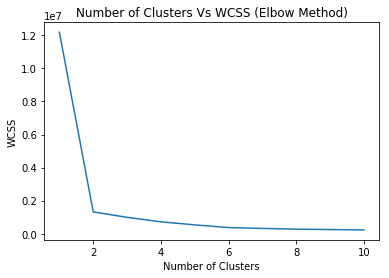

In [7]:
# wcss means Within Cluster Sum of Squares i.e. used to measure the efficicency or performance of a Cluster algorithm
# It calculates the sum of squared distances btw every point in a cluster to its centroid.
# The lower the wcss the better the algorithm
wcss = list()

# finding the best k i.e. number of clusters, Using elbow method
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Number of Clusters Vs WCSS (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
print(wcss)

[12184626.129627977, 1316420.8509477186, 992634.060670247, 719601.1096991899, 534702.5445938024, 372836.9652913574, 319750.0484366306, 276889.0643252953, 252723.04683524137, 230324.2056637643]


# Using The Best, k, Value (Elbow method)

## ---------------------------------------------------------------------------------------------

## At k = 2

In [9]:
# From the graph above, the best clusters is at k = 2

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Plotting the Clusters At K = 2

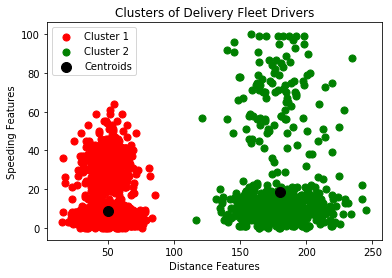

In [10]:
plt.scatter(X[y_kmeans == 0]['Distance_Feature'], X[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Distance_Feature'], X[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label='Centroids')
plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend()
plt.show()

In [11]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [12]:
kmeans.inertia_

1316420.8509477186

In [13]:
X_copy1 = X.copy()
X_copy1['Predicted Cluster'] = y_kmeans
# OR X_copy1['Predicted Cluster'] = kmeans.labels_
X_copy1

,Distance_Feature,Speeding_Feature,Predicted Cluster
0,71.24,28.0,0
1,52.53,25.0,0
2,64.54,27.0,0
3,55.69,22.0,0
4,54.58,25.0,0
...,...,...,...
3995,160.04,10.0,1
3996,176.17,5.0,1
3997,170.91,12.0,1
3998,176.14,5.0,1


In [14]:
X_copy1['Predicted Cluster'].value_counts()

0    3200
1     800
Name: Predicted Cluster, dtype: int64

## ---------------------------------------------------------------------------------------------

## At k = 4

In [15]:
# From the graph above, the best clusters is at k = 2

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Plotting the Clusters At K = 4

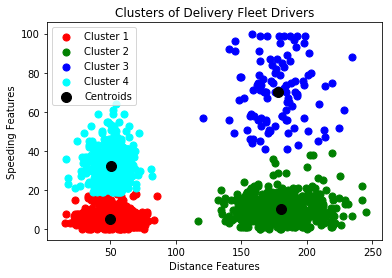

In [16]:
plt.scatter(X[y_kmeans == 0]['Distance_Feature'], X[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Distance_Feature'], X[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Distance_Feature'], X[y_kmeans == 2]['Speeding_Feature'], s = 50, c = 'blue', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['Distance_Feature'], X[y_kmeans == 3]['Speeding_Feature'], s = 50, c = 'cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label='Centroids')

plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend(loc='upper left')
plt.show()

In [17]:
kmeans.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [18]:
kmeans.inertia_

719601.1096991899

In [19]:
X_copy2 = X.copy()
X_copy2['Predicted Cluster'] = y_kmeans
# OR X_copy2['Predicted Cluster'] = kmeans.labels_
X_copy2

,Distance_Feature,Speeding_Feature,Predicted Cluster
0,71.24,28.0,3
1,52.53,25.0,3
2,64.54,27.0,3
3,55.69,22.0,3
4,54.58,25.0,3
...,...,...,...
3995,160.04,10.0,1
3996,176.17,5.0,1
3997,170.91,12.0,1
3998,176.14,5.0,1


In [20]:
X_copy2['Predicted Cluster'].value_counts()

0    2773
1     696
3     427
2     104
Name: Predicted Cluster, dtype: int64

## ---------------------------------------------------------------------------------------------

## At k = 6

In [21]:
# From the graph above, the best clusters is at k = 2

kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Plotting the Clusters At K = 6

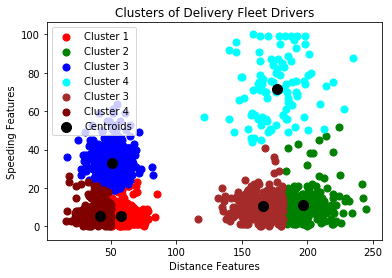

In [22]:
plt.scatter(X[y_kmeans == 0]['Distance_Feature'], X[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Distance_Feature'], X[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Distance_Feature'], X[y_kmeans == 2]['Speeding_Feature'], s = 50, c = 'blue', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['Distance_Feature'], X[y_kmeans == 3]['Speeding_Feature'], s = 50, c = 'cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['Distance_Feature'], X[y_kmeans == 4]['Speeding_Feature'], s = 50, c = 'brown', label='Cluster 3')
plt.scatter(X[y_kmeans == 5]['Distance_Feature'], X[y_kmeans == 5]['Speeding_Feature'], s = 50, c = 'maroon', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label='Centroids')

plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend(loc='upper left')
plt.show()

In [23]:
kmeans.cluster_centers_

array([[ 57.85701936,   5.28215768],
       [196.74984848,  11.30606061],
       [ 50.61421836,  33.06203474],
       [176.55112245,  71.84693878],
       [166.08655914,  10.37634409],
       [ 41.52009623,   5.39600296]])

In [24]:
kmeans.inertia_

372836.9652913574

In [25]:
X_copy3 = X.copy()
X_copy3['Predicted Cluster'] = y_kmeans
# OR X_copy3['Predicted Cluster'] = kmeans.labels_
X_copy3

,Distance_Feature,Speeding_Feature,Predicted Cluster
0,71.24,28.0,2
1,52.53,25.0,2
2,64.54,27.0,2
3,55.69,22.0,2
4,54.58,25.0,2
...,...,...,...
3995,160.04,10.0,4
3996,176.17,5.0,4
3997,170.91,12.0,4
3998,176.14,5.0,4


In [26]:
X_copy3['Predicted Cluster'].value_counts()

0    1449
5    1348
2     403
4     373
1     329
3      98
Name: Predicted Cluster, dtype: int64